In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
creditos= pd.read_csv('Casocreditos.csv')

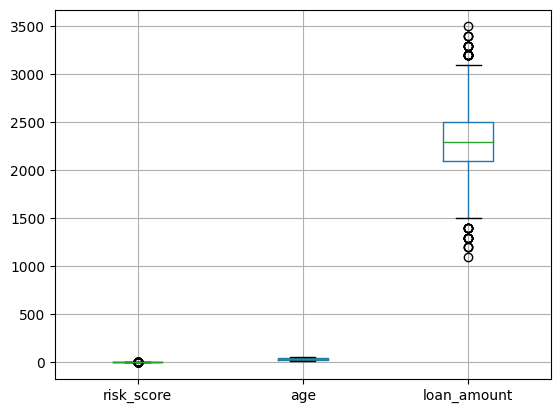

In [21]:
boxplot = creditos.boxplot(column=['risk_score','age','loan_amount'])  

<AxesSubplot:ylabel='Frequency'>

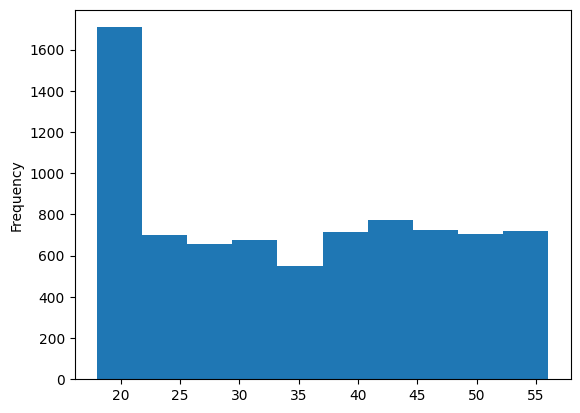

In [22]:
creditos['age'].plot(kind='hist')

**CLUSTERS**

In [25]:
iris= pd.read_csv('iris.csv')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

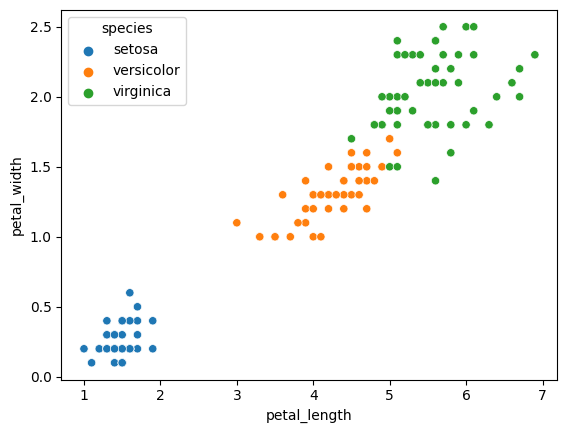

In [27]:
sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue='species')


In [29]:
from scipy.cluster import hierarchy

In [30]:
iris_subset=iris.sample(20)
iris_subset

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [142.5, 142.5, 173.75, 173.75],
  [112.5, 112.5, 158.125, 158.125],
  [73.75, 73.75, 135.3125, 135.3125],
  [25.0, 25.0, 104.53125, 104.53125]],
 'dcoord': [[0.0, 0.33166247903553986, 0.33166247903553986, 0.0],
  [0.0, 0.22360679774997896, 0.22360679774997896, 0.0],
  [0.0, 0.4690415759823426, 0.4690415759823426, 0.0],
  [0.22360679774997896,
   0.9027735042633893,
   0.9027735042633893,
   0.4690415759823426],
  [0.33166247903553986,
   1.5869257491556854,
   1.5869257491556854,
   0.9027735042633893],
  [0.0, 0.5099019513592786, 0.509

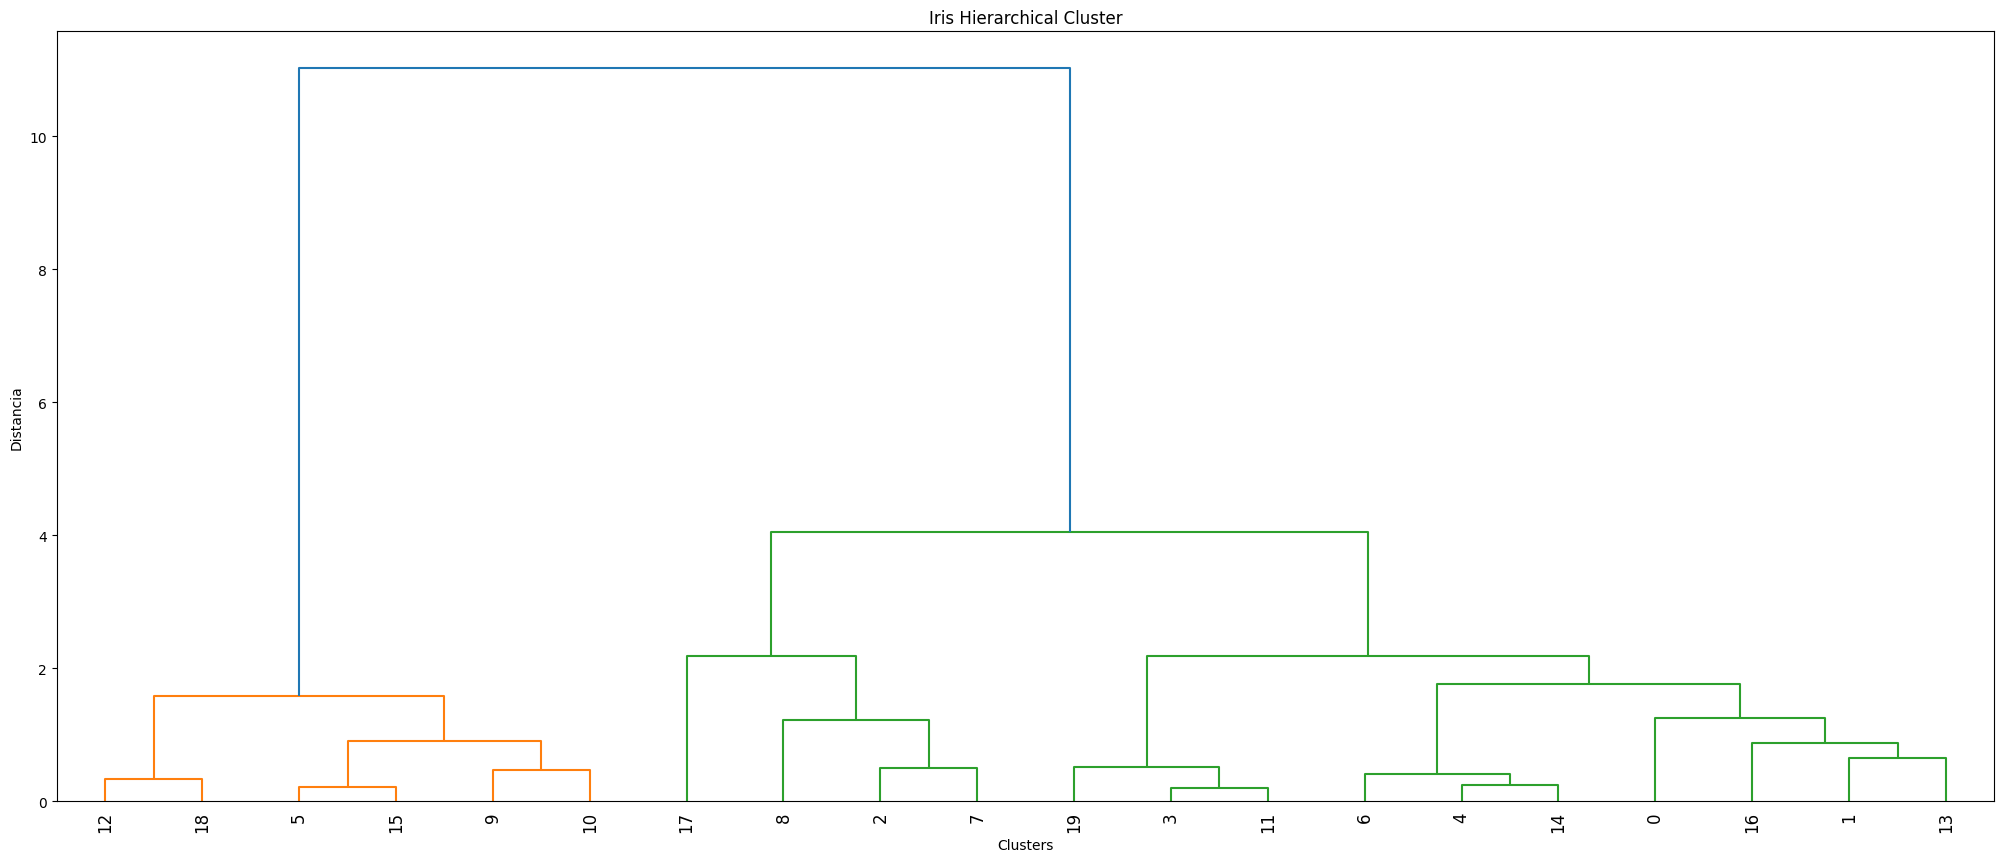

In [33]:
plt.figure(figsize=(25,10))
plt.title('Iris Hierarchical Cluster')
plt.xlabel('Clusters')
plt.ylabel('Distancia')
hierarchy.dendrogram(Z,leaf_rotation=90)

In [34]:
Z=hierarchy.linkage(iris_subset.drop('species',axis=1),'ward')